In [73]:
import math
import seaborn as sns
import numpy as np
import pandas as pd
dfhouses = pd.read_csv("./Data Mining - Python/House Sales/housesales.csv")

In [74]:
dfhouses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<h1>Descrição das variáveis</h1>

<h4>
id = atributo de identificação<br>
date = dia em que a casa foi vendida<br>
bedrooms = número de quartos<br>
bathrooms = número de banheiros<br>
sqft_living = área em pés quadrados do espaço interior <br>
sqft_lot = área em pés quadrados do terreno<br>
floors = número de pisos<br>
waterfront = se é à beira-mar ou não<br>
view = uma nota de 0 a 4 que avalia o quão boa é a visão da casa<br>
condition = uma nota de 1 a 5 para a condição da casa<br>
grade = nota de 1 a 13 para a casa, onde de 1-3 a casa tem estrutura e design ruins, 7 tem um nível médio de estrutura e design, e 11-13 tem uma alta qualidade de estrutura e design.<br>
sqft_above = área em pés quadrados do interior da casa que está acima do nível da terra<br>
sqft_basement = área em pés quadrados do interior da casa que está abaixo do nível da terra<br>
yr_built = ano em que a casa foi construída<br>
yr_renovated = o ano da última renovação da casa<br>
zipcode = código postal da casa<br>
lat = latitude<br>
long = longitudo<br>
sqft_living15 = área em pés quadrados do espaço interior dos 15 vizinhos mais próximos<br>
sqft_lot15 = área em pés quadrados do terreno dos 15 vizinhos mais próximos
</h4>
<h1> Objetivo da Mineração</h1>
<h4>Determinar quais atributos encarecem o preço das casas em geral, sendo possível criar um modelo que seja capaz de atribuir um valor a uma nova instância com base no número de quartos, banheiros e etc…</h4><br><br>
<h4>---------------------------------------------------------------------------------------------------------------------------------------------------------------------</h4>

<h4>Na célula abaixo, tentei verificar instâncias inconsistentes, por exemplo alguma que estivesse com menos de 1 piso, ou que tenha número de quartos e banheiros negativos, bem como áreas e preço. Porém, nenhuma instância foi encontrada.</h4>

In [75]:
dfhouses.loc[(dfhouses['floors']) < 1.0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


<h4>Após analisar o conjunto de dados, conclui que algumas váriaveis seriam inúteis para meu objetivo de mineração, são elas: date, yr_renovated; sqft_above e sqft_basement, que somadas resultam no mesmo valor de sqft_living; e lat e long, que não são bons discriminadores. Nesse sentido, pode-se utilizar o zipcode para verificar qual área/bairro é mais bem avaliado ao invés de lat e long. Portanto, fiz um df.drop() em todas essas colunas, conforme segue abaixo</h4>

In [76]:
dfhouses = dfhouses.drop(columns=['date', 'yr_renovated', 'sqft_above', 'sqft_basement', 'lat', 'long'])
dfhouses

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,98028,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,2009,98103,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2014,98146,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,2009,98144,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,2004,98027,1410,1287


<h4>Após isso, decidi transformar as áreas em pés quadrados para metros quadrados. Então defini uma simples função que faça o cálculo e atribui essas novas colunas ao dataset, renomeando suas columas para “sqm” (square meters)</h4>

In [77]:
def conversao(x):
    y=x * 0.092903;
    return np.ceil(y);

In [80]:
new_sqft_living = conversao(dfhouses['sqft_living'])
dfhouses = dfhouses.assign(sqft_living=new_sqft_living);
dfhouses

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,110.0,5650,1.0,0,0,3,7,1955,98178,1340,5650
1,6414100192,538000.0,3,2.25,239.0,7242,2.0,0,0,3,7,1951,98125,1690,7639
2,5631500400,180000.0,2,1.00,72.0,10000,1.0,0,0,3,6,1933,98028,2720,8062
3,2487200875,604000.0,4,3.00,183.0,5000,1.0,0,0,5,7,1965,98136,1360,5000
4,1954400510,510000.0,3,2.00,157.0,8080,1.0,0,0,3,8,1987,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,143.0,1131,3.0,0,0,3,8,2009,98103,1530,1509
21609,6600060120,400000.0,4,2.50,215.0,5813,2.0,0,0,3,8,2014,98146,1830,7200
21610,1523300141,402101.0,2,0.75,95.0,1350,2.0,0,0,3,7,2009,98144,1020,2007
21611,291310100,400000.0,3,2.50,149.0,2388,2.0,0,0,3,8,2004,98027,1410,1287


In [81]:
new_sqft_lot = conversao(dfhouses['sqft_lot'])
new_sqft_living15 = conversao(dfhouses['sqft_living15'])
new_sqft_lot15 = conversao(dfhouses['sqft_lot15'])
dfhouses = dfhouses.assign(sqft_lot=new_sqft_lot);
dfhouses = dfhouses.assign(sqft_living15=new_sqft_living15);
dfhouses = dfhouses.assign(sqft_lot15=new_sqft_lot15);
dfhouses.columns=['id', 'price', 'bedrooms', 'bathrooms', 'sqm_living', 'sqm_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode', 'sqm_living15', 'sqm_lot15']
dfhouses

,id,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,sqm_living15,sqm_lot15
0,7129300520,221900.0,3,1.00,110.0,525.0,1.0,0,0,3,7,1955,98178,125.0,525.0
1,6414100192,538000.0,3,2.25,239.0,673.0,2.0,0,0,3,7,1951,98125,158.0,710.0
2,5631500400,180000.0,2,1.00,72.0,930.0,1.0,0,0,3,6,1933,98028,253.0,749.0
3,2487200875,604000.0,4,3.00,183.0,465.0,1.0,0,0,5,7,1965,98136,127.0,465.0
4,1954400510,510000.0,3,2.00,157.0,751.0,1.0,0,0,3,8,1987,98074,168.0,698.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,143.0,106.0,3.0,0,0,3,8,2009,98103,143.0,141.0
21609,6600060120,400000.0,4,2.50,215.0,541.0,2.0,0,0,3,8,2014,98146,171.0,669.0
21610,1523300141,402101.0,2,0.75,95.0,126.0,2.0,0,0,3,7,2009,98144,95.0,187.0
21611,291310100,400000.0,3,2.50,149.0,222.0,2.0,0,0,3,8,2004,98027,131.0,120.0


<h3>Tipos dos dados</h3>

In [83]:
dfhouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
id              21613 non-null int64
price           21613 non-null float64
bedrooms        21613 non-null int64
bathrooms       21613 non-null float64
sqm_living      21613 non-null float64
sqm_lot         21613 non-null float64
floors          21613 non-null float64
waterfront      21613 non-null int64
view            21613 non-null int64
condition       21613 non-null int64
grade           21613 non-null int64
yr_built        21613 non-null int64
zipcode         21613 non-null int64
sqm_living15    21613 non-null float64
sqm_lot15       21613 non-null float64
dtypes: float64(7), int64(8)
memory usage: 2.5 MB


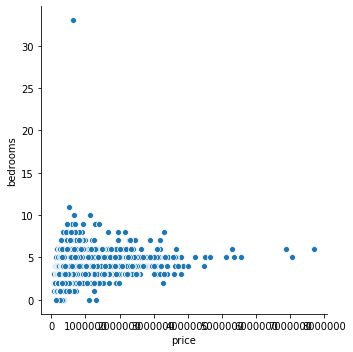

In [87]:
sns.relplot(x='price', y='bedrooms', data=dfhouses)

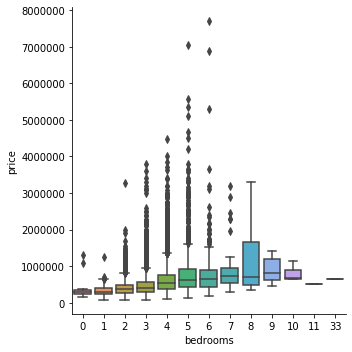

In [90]:
sns.catplot(x="bedrooms", y="price", kind="box", data=dfhouses)